<a href="https://colab.research.google.com/github/Ryan-Dagnino/MAT422/blob/main/MAT422_HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1.3**

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# **QR Decomposition**

QR decomposition using the Gram-Schmidt algorithm to create the matrix of orthonormal vectors, then splits it into two new matrices, the Q and R. The R matrix will be an upper triangular matrix. The formula is A = QR

[[ 0.22423053  0.89698194 -0.38097779]
 [ 0.52320456  0.219011    0.82358434]
 [ 0.8221786  -0.38400207 -0.42019609]]


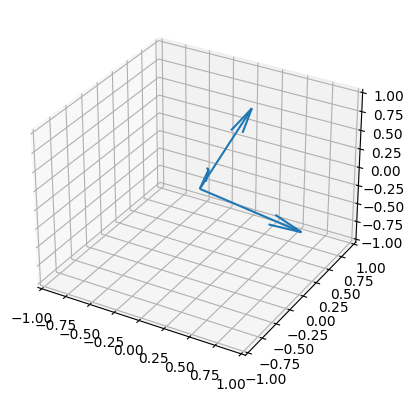

The above graph shows the 3 vectors that have been orthogonalized
[[ 13.  14.  18.]
 [ -0.  13. -12.]
 [ -0.   0.   0.]]
This shows the upper triangular matrix created from the QR decomposition


In [2]:
# Calculate using the Gram-Schmidt algorithm
A = np.array([[3, 15, -7], [7, 10, 7], [11, 6, 19]])

v1 = np.array([3, 7, 11])
v2 = np.array([15, 10, 6])
v3 = np.array([-7, 7, 19])

# Normalize the vector

e1 = v1 / la.norm(v1)

# Project v2 onto the normalized v1 and normalize it

p2 = (np.dot(v2, v1) / la.norm(v1)**2) * v1
tempE2 = v2 - p2
e2 = tempE2 / la.norm(tempE2)

# Make v3 orthogonal to both v1 and v2

dotV1 = np.dot(v3, e1)
dotV2 = np.dot(v3, e2)
tempE3 = v3 - (np.multiply(dotV1, e1) + np.multiply(dotV2, e2))
e3 = tempE3 / la.norm(tempE3)

# Add the vectors and print the result

M = np.array([[e1[0], e2[0], e3[0]],[e1[1], e2[1], e3[1]],[e1[2], e2[2], e3[2]]])
print(M)

# In order to confirm the orthogonality of the vectors, we will map this onto a graph

f = plt.figure()
ax = plt.axes(projection = '3d')
begin = [0,0,0]

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.quiver(begin[0], begin[1], begin[2], e1[0], e1[1], e1[2])
ax.quiver(begin[0], begin[1], begin[2], e2[0], e2[1], e2[2])
ax.quiver(begin[0], begin[1], begin[2], e3[0], e3[1], e3[2])
plt.show()

print('The above graph shows the 3 vectors that have been orthogonalized')

# Calculation of the QR decomposition

QT = np.transpose(M)
R = QT @ A
r = np.rint(R)
print(r)
print('This shows the upper triangular matrix created from the QR decomposition')


# **Least-Squares Problems**


Using the QR decomposition, we can take data and find the line that results in the least deviation

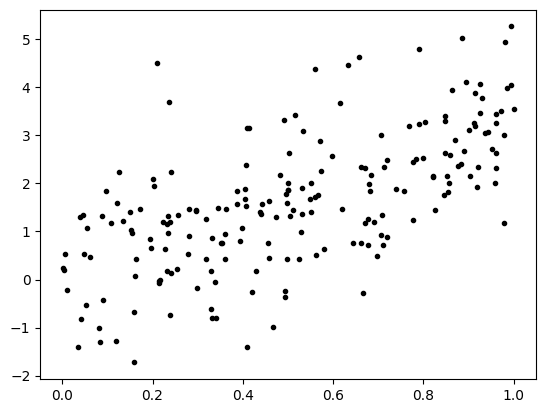

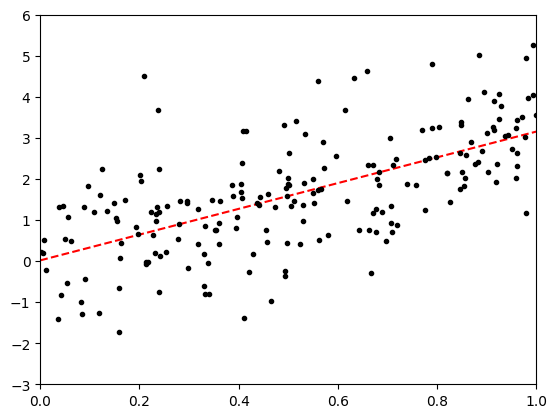

In [29]:
# We want to use random data to begin to apply the least square problem

randA = np.random.rand(200, 1)
randB = 3 * randA + np.random.randn(200, 1)

randAT = np.transpose(randA)

# Plot data

plt.plot(randA, randB, "k.")
plt.show()

# Now to create a line to predict the pattern of the data

tempA = np.array([[0], [2]])
tempA_b = np.c_[np.ones((2,1)), tempA]

randA_randB = np.c_[np.ones((200, 1)), randA]

parameters = la.inv((np.transpose(randA_randB)).dot(randA_randB)).dot(np.transpose(randA_randB)).dot(randB)

line = tempA_b.dot(parameters)

plt.plot(tempA, line, 'r--')
plt.plot(randA, randB, 'k.')
plt.axis([0, 1, -3, 6])
plt.show()